In [4]:
import pandas as pd
import numpy as np
from scipy.stats import entropy, kurtosis
import pywt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Function to compute Discrete Wavelet Transform (DWT) coefficients for a signal (column)
def calculate_dwt(signal):
    coeffs = pywt.wavedec(signal, 'db1')  # Using Daubechies wavelet of order 1
    return np.concatenate(coeffs)

# Load your dataset
dataset_path = 'features_raw.csv'  # Replace 'your_dataset.csv' with the path to your dataset
dataset = pd.read_csv(dataset_path)

# Drop columns with no observed values
dataset.drop(columns=['Unnamed: 32'], inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X = dataset.drop(columns=['Fp1'])
y = dataset['Fp1']  # Replace 'Labels' with the actual column name containing your labels
X_imputed = imputer.fit_transform(X)

# Define thresholds to divide continuous labels into classes
thresholds = [0, 0.5, 1.0]  # Example thresholds, adjust as needed

# Map continuous labels to discrete classes based on thresholds
discrete_labels = pd.cut(y_train, bins=thresholds, labels=['Low', 'Medium', 'High'])

# Get the 'Fp1' column data
signal_data = dataset['Fp1']

# Calculate Discrete Wavelet Transform (DWT) coefficients for the 'Fp1' column
dwt_coefficients = calculate_dwt(signal_data)

# Calculate statistics for the 'Fp1' column
std_dev = np.std(signal_data)
variance = np.var(signal_data)
ent = entropy(signal_data.value_counts(normalize=True), base=2)
kurt = kurtosis(signal_data)

# Plot the waveform for the 'Fp1' column
plt.figure(figsize=(10, 5))
plt.plot(signal_data, color='blue', linewidth=2)
plt.title("Waveform for 'Fp1'", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True)
plt.show()

# Prepare data for KNN classification
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train_scaled, y_train)

# Predict using KNN model
knn_y_pred = knn_model.predict(X_test_scaled)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)

# Classification report
knn_report = classification_report(y_test, knn_y_pred)

# Print the computed statistics for the 'Fp1' column
print("Statistics for 'Fp1':")
print("DWT Coefficients:", dwt_coefficients)
print("Standard Deviation:", std_dev)
print("Variance:", variance)
print("Entropy:", ent)
print("Kurtosis:", kurt)

# Print KNN accuracy
print("KNN Accuracy:", knn_accuracy)

# Print classification report
print("KNN Classification Report:")
print(knn_report)


ValueError: Bin labels must be one fewer than the number of bin edges

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Suppress FutureWarning about n_init
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load datasets and compute features
datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv',
            'student6.csv', 'student7.csv', 'student8.csv', 'student9.csv', 'student10.csv',
            'S1.csv', 'S2.csv', 'S3.csv', 'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv', 'S9.csv', 'S10.csv']

# Initialize lists to store features
std_devs = []
skews = []
kurts = []

# Compute features for each dataset
for dataset in datasets:
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = skew(df.values).flatten()  # Flatten the output
    kurt = kurtosis(df.values).flatten()  # Flatten the output
    std_devs.append(std_dev)
    skews.append(skewness[0])  # Append the first element of the flattened array
    kurts.append(kurt[0])  # Append the first element of the flattened array

# Prepare features for clustering
features = np.column_stack((std_devs, skews, kurts))

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)

# Apply KNN clustering
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(features_pca, datasets)  # Fit the model
cluster_labels_knn = knn.predict(features_pca)  # Predict using the model

# Calculate accuracy score
accuracy = accuracy_score(datasets, cluster_labels_knn)

# Define colors for each dataset
colors = ['blue' if 'student' in dataset else 'red' for dataset in datasets]

# Plot 3D scatter plot with KNN clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for KNN clusters
for i in range(len(datasets)):
    ax.scatter(features_pca[i, 0], features_pca[i, 1], features_pca[i, 2], c=colors[i], s=50)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('KNN Clustering of Datasets (PCA)')

# Add a text box with accuracy score
ax.text2D(0.05, 0.95, f'Accuracy: {accuracy:.2f}', transform=ax.transAxes, color='black', fontsize=12,
          bbox=dict(facecolor='lightgrey', alpha=0.5))

plt.show()

# Print cluster labels for each dataset
print("Cluster labels for KNN:")
for i, dataset in enumerate(datasets):
    print(f"Dataset {dataset} belongs to cluster: {cluster_labels_knn[i]}")


NameError: name 'skew' is not defined

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Import skew function from scipy.stats
from scipy.stats import skew

# Suppress FutureWarning about n_init
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load datasets and compute features
datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv',
            'student6.csv', 'student7.csv', 'student8.csv', 'student9.csv', 'student10.csv',
            'S1.csv', 'S2.csv', 'S3.csv', 'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv', 'S9.csv', 'S10.csv']

# Initialize lists to store features
std_devs = []
skews = []
kurts = []

# Compute features for each dataset
for dataset in datasets:
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = skew(df.values).flatten()  # Flatten the output
    kurt = kurtosis(df.values).flatten()  # Flatten the output
    std_devs.append(std_dev)
    skews.append(skewness[0])  # Append the first element of the flattened array
    kurts.append(kurt[0])  # Append the first element of the flattened array

# Prepare features for clustering
features = np.column_stack((std_devs, skews, kurts))

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)

# Apply KNN clustering
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(features_pca, datasets)  # Fit the model
cluster_labels_knn = knn.predict(features_pca)  # Predict using the model

# Calculate accuracy score
accuracy = accuracy_score(datasets, cluster_labels_knn)

# Define colors for each dataset
colors = ['blue' if 'student' in dataset else 'red' for dataset in datasets]

# Plot 3D scatter plot with KNN clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for KNN clusters
for i in range(len(datasets)):
    ax.scatter(features_pca[i, 0], features_pca[i, 1], features_pca[i, 2], c=colors[i], s=50)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('KNN Clustering of Datasets (PCA)')

# Add a text box with accuracy score
ax.text2D(0.05, 0.95, f'Accuracy: {accuracy:.2f}', transform=ax.transAxes, color='black', fontsize=12,
          bbox=dict(facecolor='lightgrey', alpha=0.5))

plt.show()

# Print cluster labels for each dataset
print("Cluster labels for KNN:")
for i, dataset in enumerate(datasets):
    print(f"Dataset {dataset} belongs to cluster: {cluster_labels_knn[i]}")


NameError: name 'kurtosis' is not defined

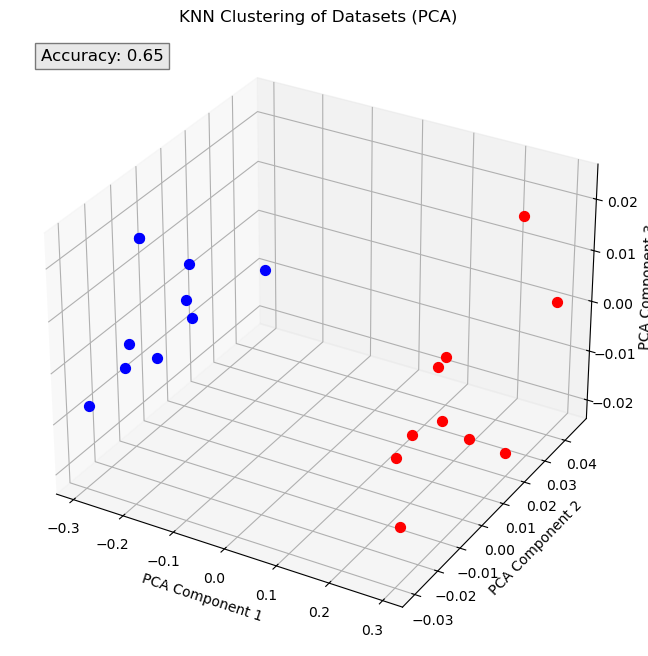

Cluster labels for KNN:
Dataset student1.csv belongs to cluster: student1.csv
Dataset student2.csv belongs to cluster: student2.csv
Dataset student3.csv belongs to cluster: student3.csv
Dataset student4.csv belongs to cluster: student3.csv
Dataset student5.csv belongs to cluster: student5.csv
Dataset student6.csv belongs to cluster: student6.csv
Dataset student7.csv belongs to cluster: student7.csv
Dataset student8.csv belongs to cluster: student5.csv
Dataset student9.csv belongs to cluster: student7.csv
Dataset student10.csv belongs to cluster: student10.csv
Dataset S1.csv belongs to cluster: S1.csv
Dataset S2.csv belongs to cluster: S2.csv
Dataset S3.csv belongs to cluster: S1.csv
Dataset S4.csv belongs to cluster: S4.csv
Dataset S5.csv belongs to cluster: S10.csv
Dataset S6.csv belongs to cluster: S6.csv
Dataset S7.csv belongs to cluster: S7.csv
Dataset S8.csv belongs to cluster: S2.csv
Dataset S9.csv belongs to cluster: S6.csv
Dataset S10.csv belongs to cluster: S10.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Import skew and kurtosis functions from scipy.stats
from scipy.stats import skew, kurtosis

# Suppress FutureWarning about n_init
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load datasets and compute features
datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv',
            'student6.csv', 'student7.csv', 'student8.csv', 'student9.csv', 'student10.csv',
            'S1.csv', 'S2.csv', 'S3.csv', 'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv', 'S9.csv', 'S10.csv']

# Initialize lists to store features
std_devs = []
skews = []
kurts = []

# Compute features for each dataset
for dataset in datasets:
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = skew(df.values).flatten()  # Flatten the output
    kurt = kurtosis(df.values).flatten()  # Flatten the output
    std_devs.append(std_dev)
    skews.append(skewness[0])  # Append the first element of the flattened array
    kurts.append(kurt[0])  # Append the first element of the flattened array

# Prepare features for clustering
features = np.column_stack((std_devs, skews, kurts))

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)

# Apply KNN clustering
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(features_pca, datasets)  # Fit the model
cluster_labels_knn = knn.predict(features_pca)  # Predict using the model

# Calculate accuracy score
accuracy = accuracy_score(datasets, cluster_labels_knn)

# Define colors for each dataset
colors = ['blue' if 'student' in dataset else 'red' for dataset in datasets]

# Plot 3D scatter plot with KNN clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for KNN clusters
for i in range(len(datasets)):
    ax.scatter(features_pca[i, 0], features_pca[i, 1], features_pca[i, 2], c=colors[i], s=50)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('KNN Clustering of Datasets (PCA)')

# Add a text box with accuracy score
ax.text2D(0.05, 0.95, f'Accuracy: {accuracy:.2f}', transform=ax.transAxes, color='black', fontsize=12,
          bbox=dict(facecolor='lightgrey', alpha=0.5))

plt.show()

# Print cluster labels for each dataset
print("Cluster labels for KNN:")
for i, dataset in enumerate(datasets):
    print(f"Dataset {dataset} belongs to cluster: {cluster_labels_knn[i]}")


The predicted label for the test dataset S9.csv is concentrate


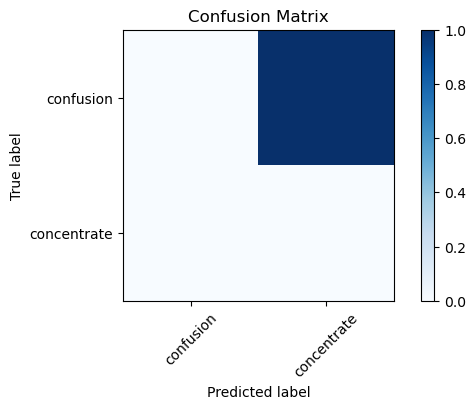

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load training datasets and compute features
train_datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv','student6.csv', 'student7.csv', 'student8.csv', 'S1.csv', 'S2.csv', 'S3.csv', 'S4.csv', 'S5.csv', 'S6.csv','S7.csv', 'S8.csv']

# Load test dataset
test_dataset = 'S9.csv'  # Adjust the filename according to your dataset

# Function to compute features
def compute_features(dataset):
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = np.mean(np.abs((df.values - np.mean(df.values, axis=0)) ** 3) ** (1/3), axis=0)  # Compute skewness
    kurt = np.mean((df.values - np.mean(df.values, axis=0)) ** 4, axis=0) / np.var(df.values, axis=0) ** 2  # Compute kurtosis
    return std_dev, skewness[0], kurt[0]

# Prepare features for training
train_features = np.array([compute_features(dataset) for dataset in train_datasets])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
train_features_pca = pca.fit_transform(train_features)

# Define labels for training datasets (confusion or concentrate)
train_labels = ['confusion' if 'student' in dataset else 'concentrate' for dataset in train_datasets]

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features_pca, train_labels)

# Prepare features for testing
test_features = np.array([compute_features(test_dataset)]).reshape(1, -1)  # Reshape for single sample
test_features_pca = pca.transform(test_features)

# Predict labels for test dataset
test_prediction = knn.predict(test_features_pca)

print(f"The predicted label for the test dataset {test_dataset} is {test_prediction[0]}")

# Assuming you have the true labels for the test dataset
true_labels = ['confusion']  # Adjust according to your dataset

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, test_prediction, labels=['confusion', 'concentrate'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['confusion', 'concentrate']))
plt.xticks(tick_marks, ['confusion', 'concentrate'], rotation=45)
plt.yticks(tick_marks, ['confusion', 'concentrate'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The predicted label for the test dataset S10.csv is concentrate


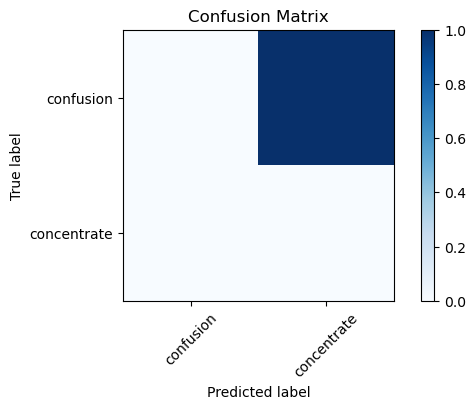

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load training datasets and compute features
train_datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv','student6.csv', 'student7.csv', 'student8.csv', 'S1.csv', 'S2.csv', 'S3.csv', 'S4.csv', 'S5.csv', 'S6.csv','S7.csv', 'S8.csv']

# Load test dataset
test_dataset = 'S10.csv'  # Adjust the filename according to your dataset

# Function to compute features
def compute_features(dataset):
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = np.mean(np.abs((df.values - np.mean(df.values, axis=0)) ** 3) ** (1/3), axis=0)  # Compute skewness
    kurt = np.mean((df.values - np.mean(df.values, axis=0)) ** 4, axis=0) / np.var(df.values, axis=0) ** 2  # Compute kurtosis
    return std_dev, skewness[0], kurt[0]

# Prepare features for training
train_features = np.array([compute_features(dataset) for dataset in train_datasets])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
train_features_pca = pca.fit_transform(train_features)

# Define labels for training datasets (confusion or concentrate)
train_labels = ['confusion' if 'student' in dataset else 'concentrate' for dataset in train_datasets]

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features_pca, train_labels)

# Prepare features for testing
test_features = np.array([compute_features(test_dataset)]).reshape(1, -1)  # Reshape for single sample
test_features_pca = pca.transform(test_features)

# Predict labels for test dataset
test_prediction = knn.predict(test_features_pca)

print(f"The predicted label for the test dataset {test_dataset} is {test_prediction[0]}")

# Assuming you have the true labels for the test dataset
true_labels = ['confusion']  # Adjust according to your dataset

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, test_prediction, labels=['confusion', 'concentrate'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['confusion', 'concentrate']))
plt.xticks(tick_marks, ['confusion', 'concentrate'], rotation=45)
plt.yticks(tick_marks, ['confusion', 'concentrate'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The predicted label for the test dataset Student9.csv is confusion


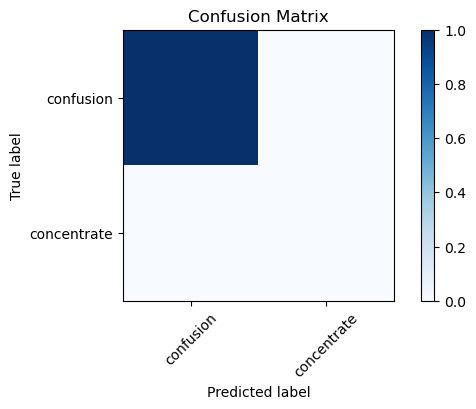

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load training datasets and compute features
train_datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv','student6.csv', 'student7.csv', 'student8.csv', 'S1.csv', 'S2.csv', 'S3.csv', 'S4.csv', 'S5.csv', 'S6.csv','S7.csv', 'S8.csv']

# Load test dataset
test_dataset = 'Student9.csv'  # Adjust the filename according to your dataset

# Function to compute features
def compute_features(dataset):
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = np.mean(np.abs((df.values - np.mean(df.values, axis=0)) ** 3) ** (1/3), axis=0)  # Compute skewness
    kurt = np.mean((df.values - np.mean(df.values, axis=0)) ** 4, axis=0) / np.var(df.values, axis=0) ** 2  # Compute kurtosis
    return std_dev, skewness[0], kurt[0]

# Prepare features for training
train_features = np.array([compute_features(dataset) for dataset in train_datasets])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
train_features_pca = pca.fit_transform(train_features)

# Define labels for training datasets (confusion or concentrate)
train_labels = ['confusion' if 'student' in dataset else 'concentrate' for dataset in train_datasets]

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features_pca, train_labels)

# Prepare features for testing
test_features = np.array([compute_features(test_dataset)]).reshape(1, -1)  # Reshape for single sample
test_features_pca = pca.transform(test_features)

# Predict labels for test dataset
test_prediction = knn.predict(test_features_pca)

print(f"The predicted label for the test dataset {test_dataset} is {test_prediction[0]}")

# Assuming you have the true labels for the test dataset
true_labels = ['confusion']  # Adjust according to your dataset

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, test_prediction, labels=['confusion', 'concentrate'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['confusion', 'concentrate']))
plt.xticks(tick_marks, ['confusion', 'concentrate'], rotation=45)
plt.yticks(tick_marks, ['confusion', 'concentrate'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The predicted label for the test dataset Student10.csv is confusion


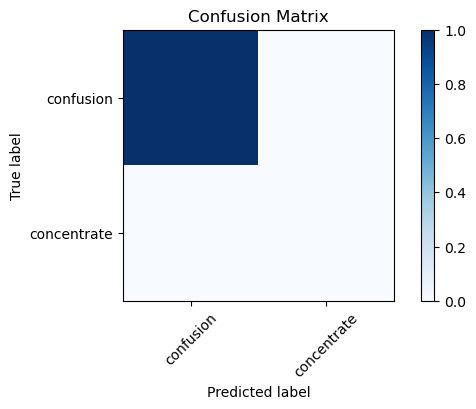

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load training datasets and compute features
train_datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv','student6.csv', 'student7.csv', 'student8.csv', 'S1.csv', 'S2.csv', 'S3.csv', 'S4.csv', 'S5.csv', 'S6.csv','S7.csv', 'S8.csv']

# Load test dataset
test_dataset = 'Student10.csv'  # Adjust the filename according to your dataset

# Function to compute features
def compute_features(dataset):
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = np.mean(np.abs((df.values - np.mean(df.values, axis=0)) ** 3) ** (1/3), axis=0)  # Compute skewness
    kurt = np.mean((df.values - np.mean(df.values, axis=0)) ** 4, axis=0) / np.var(df.values, axis=0) ** 2  # Compute kurtosis
    return std_dev, skewness[0], kurt[0]

# Prepare features for training
train_features = np.array([compute_features(dataset) for dataset in train_datasets])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
train_features_pca = pca.fit_transform(train_features)

# Define labels for training datasets (confusion or concentrate)
train_labels = ['confusion' if 'student' in dataset else 'concentrate' for dataset in train_datasets]

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features_pca, train_labels)

# Prepare features for testing
test_features = np.array([compute_features(test_dataset)]).reshape(1, -1)  # Reshape for single sample
test_features_pca = pca.transform(test_features)

# Predict labels for test dataset
test_prediction = knn.predict(test_features_pca)

print(f"The predicted label for the test dataset {test_dataset} is {test_prediction[0]}")

# Assuming you have the true labels for the test dataset
true_labels = ['confusion']  # Adjust according to your dataset

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, test_prediction, labels=['confusion', 'concentrate'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['confusion', 'concentrate']))
plt.xticks(tick_marks, ['confusion', 'concentrate'], rotation=45)
plt.yticks(tick_marks, ['confusion', 'concentrate'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


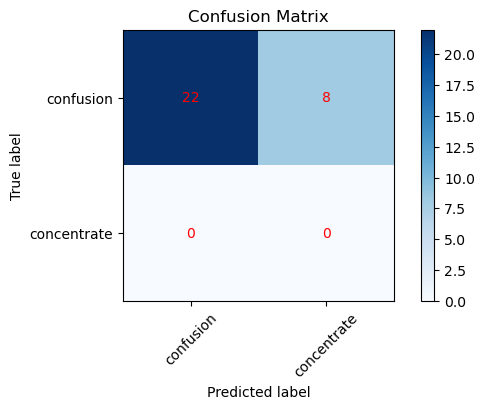

Accuracy: 0.7333333333333333


In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load training datasets and compute features
train_datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv',
                  'student6.csv', 'student7.csv', 'student8.csv', 'S1.csv', 'S2.csv', 'S3.csv',
                  'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv']

# Load test datasets
test_datasets = ['random_dataset1.csv', 'random_dataset2.csv', 'random_dataset3.csv', 'random_dataset4.csv',
                 'random_dataset5.csv', 'random_dataset6.csv', 'random_dataset7.csv', 'random_dataset8.csv',
                 'random_dataset9.csv', 'random_dataset10.csv', 'random_dataset11.csv', 'random_dataset12.csv',
                 'random_dataset13.csv', 'random_dataset14.csv', 'random_dataset15.csv', 'random_dataset16.csv',
                 'random_dataset17.csv', 'random_dataset18.csv', 'random_dataset19.csv', 'random_dataset20.csv',
                 'random_dataset31.csv', 'random_dataset32.csv', 'random_dataset33.csv', 'random_dataset34.csv',
                 'random_dataset35.csv', 'random_dataset36.csv', 'random_dataset37.csv', 'random_dataset38.csv',
                 'random_dataset29.csv', 'random_dataset30.csv']

# Function to compute features
def compute_features(dataset):
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = np.mean(np.abs((df.values - np.mean(df.values, axis=0)) ** 3) ** (1/3), axis=0)  # Compute skewness
    kurt = np.mean((df.values - np.mean(df.values, axis=0)) ** 4, axis=0) / np.var(df.values, axis=0) ** 2  # Compute kurtosis
    return std_dev, skewness[0], kurt[0]

# Prepare features for training
train_features = np.array([compute_features(dataset) for dataset in train_datasets])

# Define labels for training datasets (confusion or concentrate)
train_labels = ['confusion' if 'student' in dataset else 'concentrate' for dataset in train_datasets]

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn.fit(train_features, train_labels)

# Initialize lists to store predictions and true labels
all_test_predictions = []
all_true_labels = []

# Loop over each test dataset
for test_dataset in test_datasets:
    # Prepare features for testing
    test_features = np.array([compute_features(test_dataset)])

    # Predict label for test dataset
    test_prediction = knn.predict(test_features)
    
    # Assuming you have the true label for the test dataset
    true_label = 'confusion' if 'random_dataset' in test_dataset else 'concentrate'  # Adjust according to your dataset
    all_test_predictions.append(test_prediction[0])
    all_true_labels.append(true_label)

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_test_predictions)

# Generate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_test_predictions, labels=['confusion', 'concentrate'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['confusion', 'concentrate']))
plt.xticks(tick_marks, ['confusion', 'concentrate'], rotation=45)
plt.yticks(tick_marks, ['confusion', 'concentrate'])
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, str(conf_matrix[i][j]), ha='center', va='center', color='red')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy:", accuracy)


Number of datasets for 'confusion' cluster with KNN: 8
Number of datasets for 'concentrate' cluster with KNN: 8


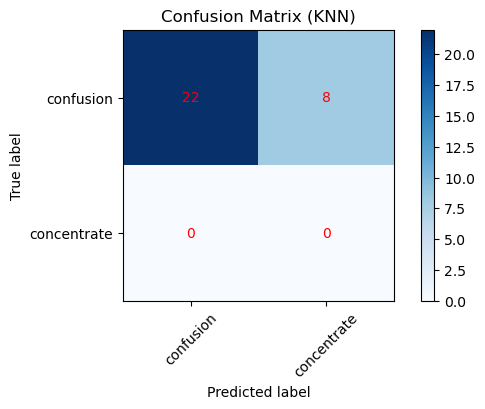

Accuracy (KNN): 0.7333333333333333


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load training datasets and compute features
train_datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv',
                  'student6.csv', 'student7.csv', 'student8.csv', 'S1.csv', 'S2.csv', 'S3.csv',
                  'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv']

# Load test datasets
test_datasets = ['random_dataset1.csv', 'random_dataset2.csv', 'random_dataset3.csv', 'random_dataset4.csv',
                 'random_dataset5.csv', 'random_dataset6.csv', 'random_dataset7.csv', 'random_dataset8.csv',
                 'random_dataset9.csv', 'random_dataset10.csv', 'random_dataset11.csv', 'random_dataset12.csv',
                 'random_dataset13.csv', 'random_dataset14.csv', 'random_dataset15.csv', 'random_dataset16.csv',
                 'random_dataset17.csv', 'random_dataset18.csv', 'random_dataset19.csv', 'random_dataset20.csv',
                 'random_dataset31.csv', 'random_dataset32.csv', 'random_dataset33.csv', 'random_dataset34.csv',
                 'random_dataset35.csv', 'random_dataset36.csv', 'random_dataset37.csv', 'random_dataset38.csv',
                 'random_dataset29.csv', 'random_dataset30.csv']

# Function to compute features
def compute_features(dataset):
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = np.mean(np.abs((df.values - np.mean(df.values, axis=0)) ** 3) ** (1/3), axis=0)  # Compute skewness
    kurt = np.mean((df.values - np.mean(df.values, axis=0)) ** 4, axis=0) / np.var(df.values, axis=0) ** 2  # Compute kurtosis
    return std_dev, skewness[0], kurt[0]

# Prepare features for training
train_features = np.array([compute_features(dataset) for dataset in train_datasets])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
train_features_pca = pca.fit_transform(train_features)

# Define labels for training datasets (confusion or concentrate)
train_labels = ['confusion' if 'student' in dataset else 'concentrate' for dataset in train_datasets]

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(train_features_pca, train_labels)

# Predict labels for training datasets
train_predictions = knn.predict(train_features_pca)

# Display the number of datasets for each cluster
num_confusion = np.sum(train_predictions == 'confusion')
num_concentrate = np.sum(train_predictions == 'concentrate')
print("Number of datasets for 'confusion' cluster with KNN:", num_confusion)
print("Number of datasets for 'concentrate' cluster with KNN:", num_concentrate)

# Initialize lists to store predictions and true labels
all_test_predictions = []
all_true_labels = []

# Loop over each test dataset
for test_dataset in test_datasets:
    # Prepare features for testing
    test_features = np.array([compute_features(test_dataset)]).reshape(1, -1)  # Reshape for single sample
    test_features_pca = pca.transform(test_features)

    # Predict label for test dataset
    test_prediction = knn.predict(test_features_pca)
    
    # Assuming you have the true label for the test dataset
    true_label = 'confusion' if 'random_dataset' in test_dataset else 'concentrate'  # Adjust according to your dataset
    all_test_predictions.append(test_prediction[0])
    all_true_labels.append(true_label)

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_test_predictions)

# Generate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_test_predictions, labels=['confusion', 'concentrate'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (KNN)')
plt.colorbar()
tick_marks = np.arange(len(['confusion', 'concentrate']))
plt.xticks(tick_marks, ['confusion', 'concentrate'], rotation=45)
plt.yticks(tick_marks, ['confusion', 'concentrate'])
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, str(conf_matrix[i][j]), ha='center', va='center', color='red')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy (KNN):", accuracy)


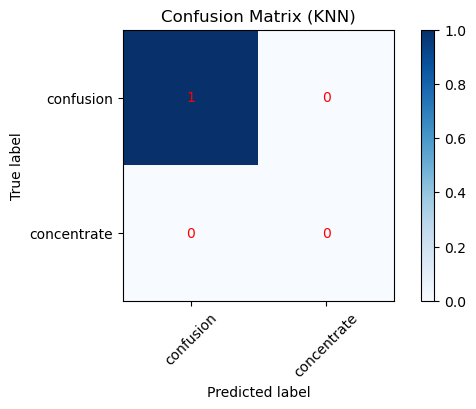

Displaying confusion picture for test dataset: random_dataset1.csv


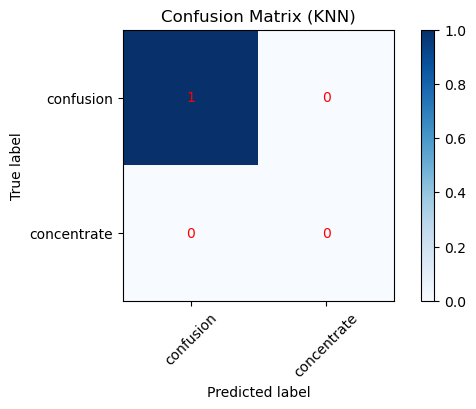

Displaying confusion picture for test dataset: random_dataset2.csv


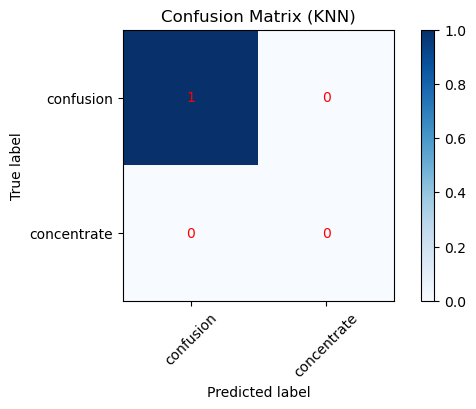

Displaying confusion picture for test dataset: random_dataset3.csv


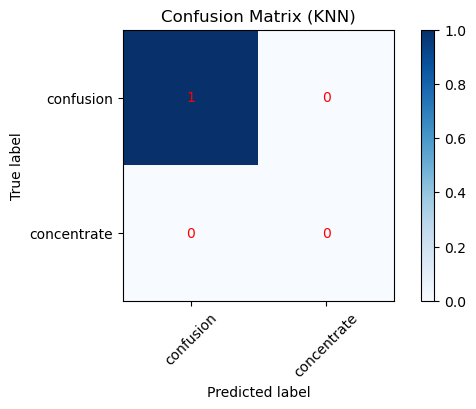

Displaying confusion picture for test dataset: random_dataset4.csv


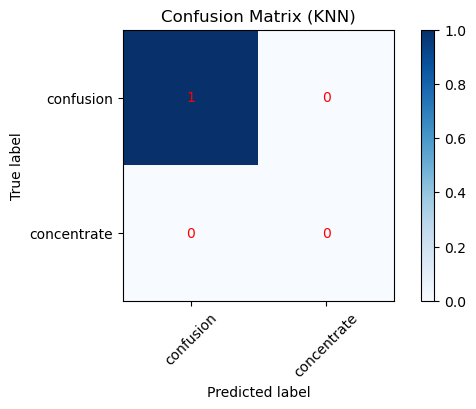

Displaying confusion picture for test dataset: random_dataset5.csv


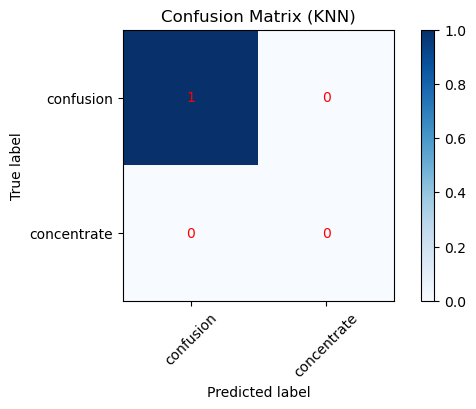

Displaying confusion picture for test dataset: random_dataset6.csv


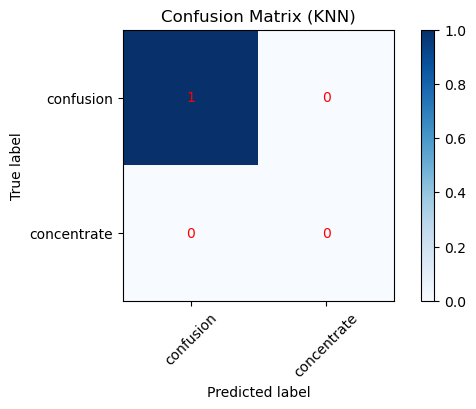

Displaying confusion picture for test dataset: random_dataset7.csv


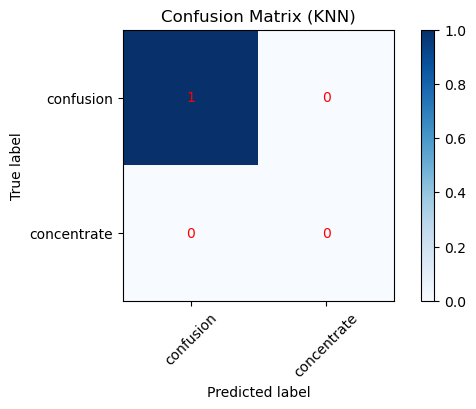

Displaying confusion picture for test dataset: random_dataset8.csv


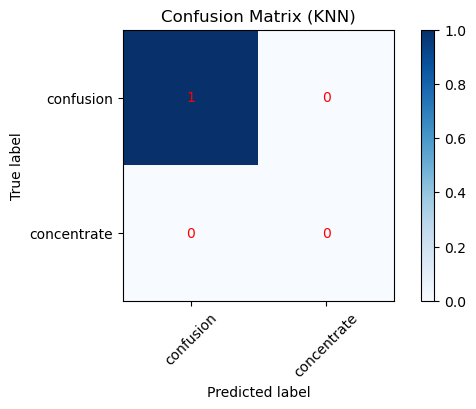

Displaying confusion picture for test dataset: random_dataset9.csv


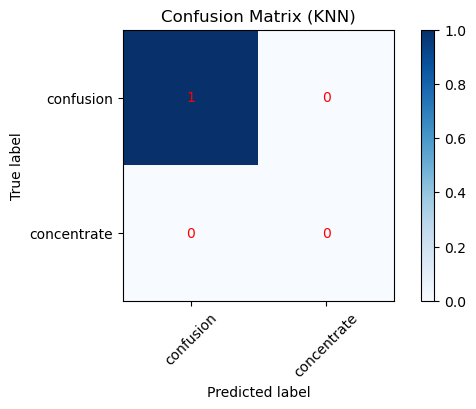

Displaying confusion picture for test dataset: random_dataset10.csv


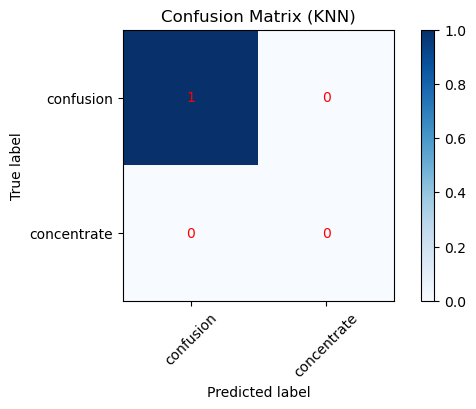

Displaying confusion picture for test dataset: random_dataset11.csv


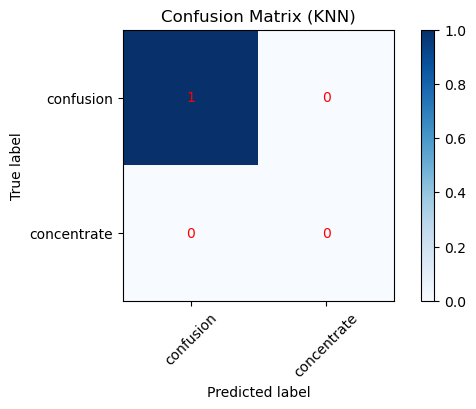

Displaying confusion picture for test dataset: random_dataset12.csv


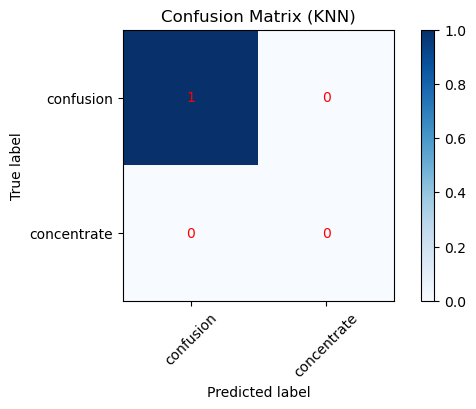

Displaying confusion picture for test dataset: random_dataset13.csv


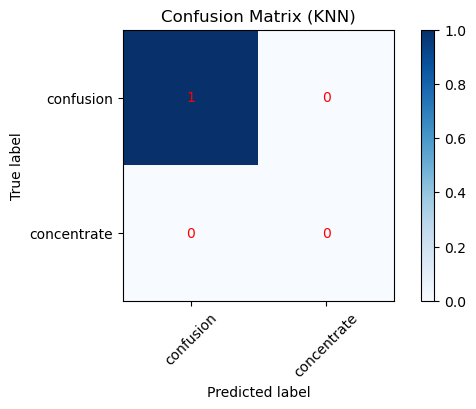

Displaying confusion picture for test dataset: random_dataset14.csv


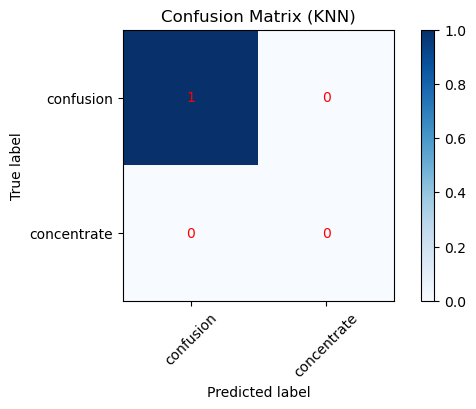

Displaying confusion picture for test dataset: random_dataset15.csv


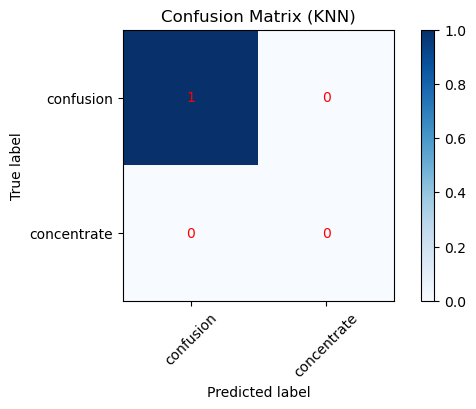

Displaying confusion picture for test dataset: random_dataset16.csv


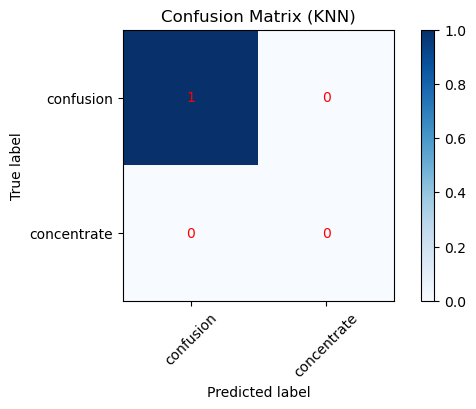

Displaying confusion picture for test dataset: random_dataset17.csv


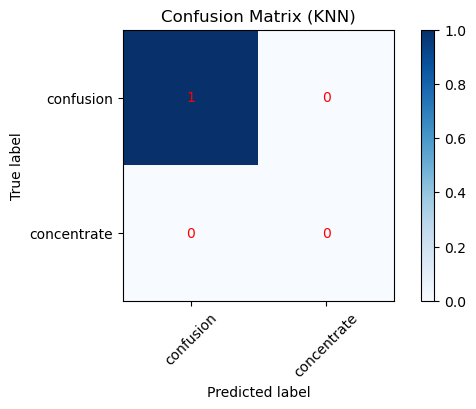

Displaying confusion picture for test dataset: random_dataset18.csv


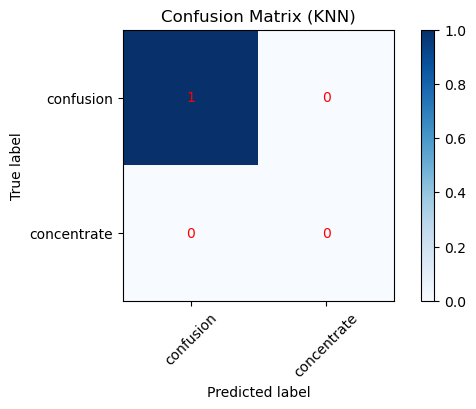

Displaying confusion picture for test dataset: random_dataset19.csv


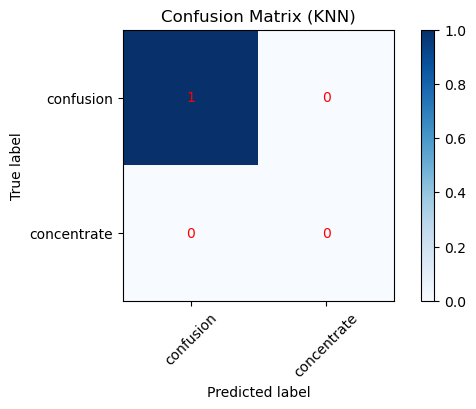

Displaying confusion picture for test dataset: random_dataset20.csv


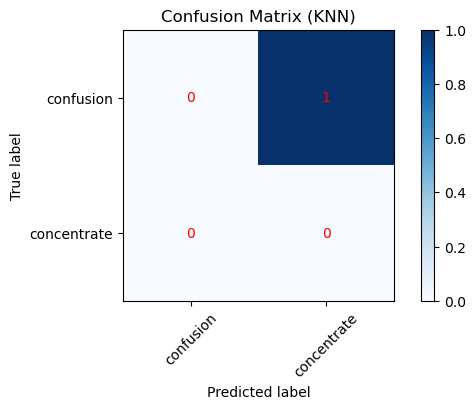

Displaying concentrate picture for test dataset: random_dataset31.csv


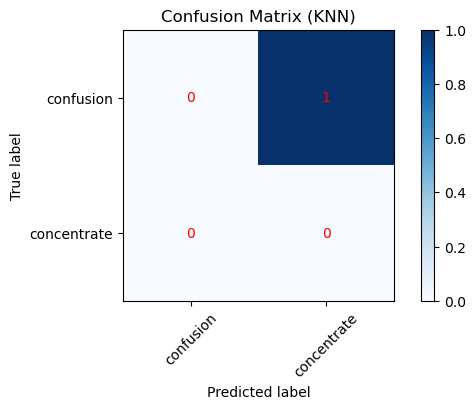

Displaying concentrate picture for test dataset: random_dataset32.csv


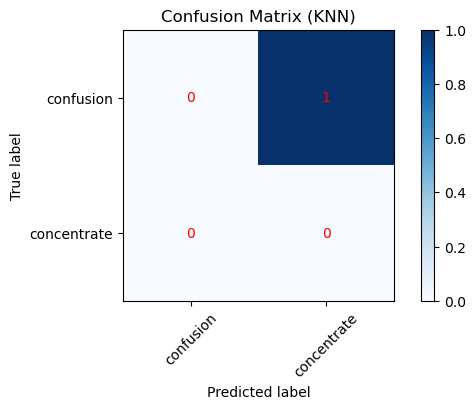

Displaying concentrate picture for test dataset: random_dataset33.csv


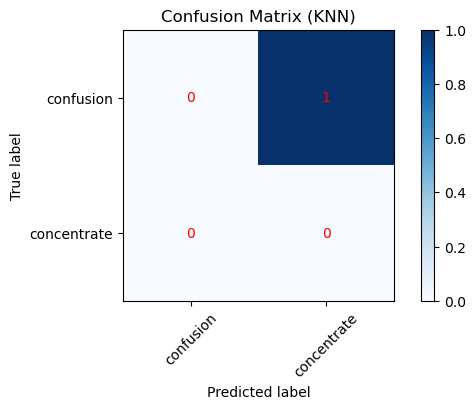

Displaying concentrate picture for test dataset: random_dataset34.csv


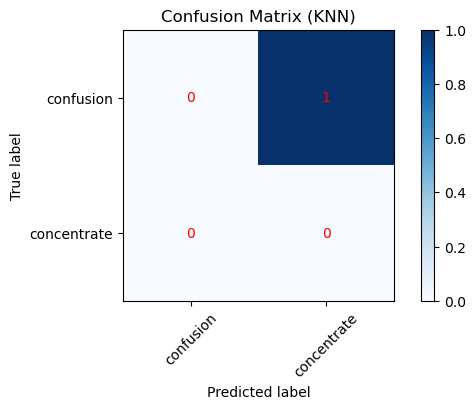

Displaying concentrate picture for test dataset: random_dataset35.csv


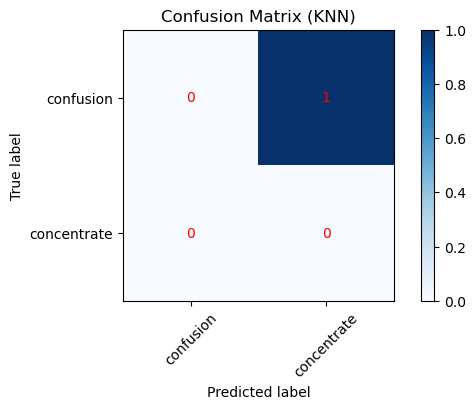

Displaying concentrate picture for test dataset: random_dataset36.csv


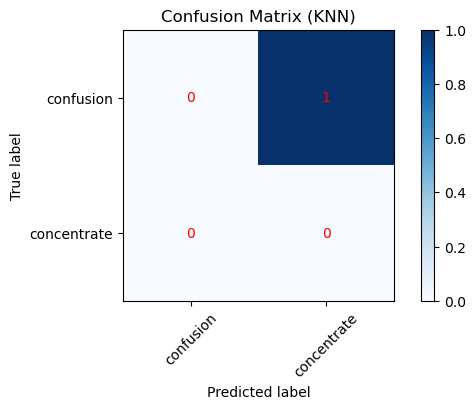

Displaying concentrate picture for test dataset: random_dataset37.csv


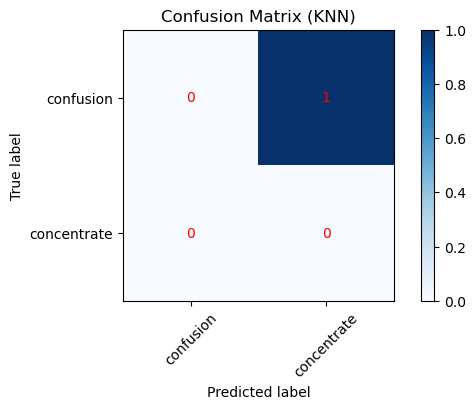

Displaying concentrate picture for test dataset: random_dataset38.csv


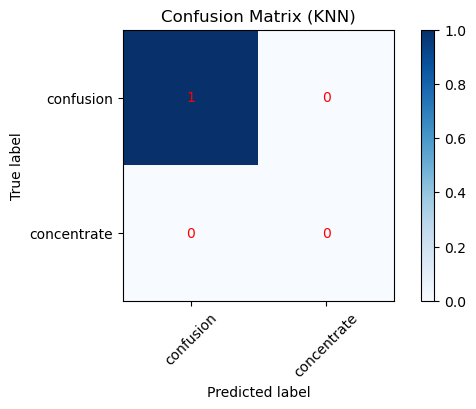

Displaying confusion picture for test dataset: random_dataset29.csv


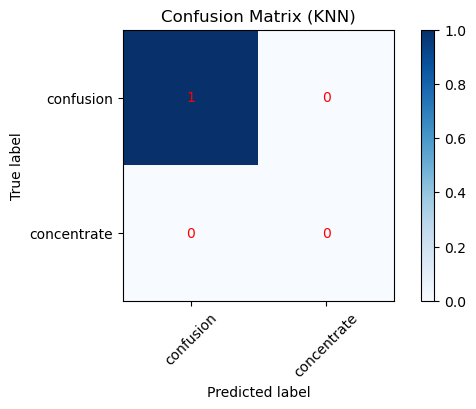

Displaying confusion picture for test dataset: random_dataset30.csv


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load training datasets and compute features
train_datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv',
                  'student6.csv', 'student7.csv', 'student8.csv', 'S1.csv', 'S2.csv', 'S3.csv',
                  'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv']

# Load test datasets
test_datasets = ['random_dataset1.csv', 'random_dataset2.csv', 'random_dataset3.csv', 'random_dataset4.csv',
                 'random_dataset5.csv', 'random_dataset6.csv', 'random_dataset7.csv', 'random_dataset8.csv',
                 'random_dataset9.csv', 'random_dataset10.csv', 'random_dataset11.csv', 'random_dataset12.csv',
                 'random_dataset13.csv', 'random_dataset14.csv', 'random_dataset15.csv', 'random_dataset16.csv',
                 'random_dataset17.csv', 'random_dataset18.csv', 'random_dataset19.csv', 'random_dataset20.csv',
                 'random_dataset31.csv', 'random_dataset32.csv', 'random_dataset33.csv', 'random_dataset34.csv',
                 'random_dataset35.csv', 'random_dataset36.csv', 'random_dataset37.csv', 'random_dataset38.csv',
                 'random_dataset29.csv', 'random_dataset30.csv']

# Function to compute features
def compute_features(dataset):
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = np.mean(np.abs((df.values - np.mean(df.values, axis=0)) ** 3) ** (1/3), axis=0)  # Compute skewness
    kurt = np.mean((df.values - np.mean(df.values, axis=0)) ** 4, axis=0) / np.var(df.values, axis=0) ** 2  # Compute kurtosis
    return std_dev, skewness[0], kurt[0]

# Prepare features for training
train_features = np.array([compute_features(dataset) for dataset in train_datasets])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
train_features_pca = pca.fit_transform(train_features)

# Define labels for training datasets (confusion or concentrate)
train_labels = ['confusion' if 'student' in dataset else 'concentrate' for dataset in train_datasets]

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(train_features_pca, train_labels)

def analyze_test_dataset(test_dataset):
    # Prepare features for testing
    test_features = np.array([compute_features(test_dataset)]).reshape(1, -1)  # Reshape for single sample
    test_features_pca = pca.transform(test_features)

    # Predict label for test dataset
    test_prediction = knn.predict(test_features_pca)
    
    # Assuming you have the true label for the test dataset
    true_label = 'confusion' if 'random_dataset' in test_dataset else 'concentrate'  # Adjust according to your dataset

    # Generate confusion matrix
    conf_matrix = confusion_matrix([true_label], [test_prediction[0]], labels=['confusion', 'concentrate'])

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (KNN)')
    plt.colorbar()
    tick_marks = np.arange(len(['confusion', 'concentrate']))
    plt.xticks(tick_marks, ['confusion', 'concentrate'], rotation=45)
    plt.yticks(tick_marks, ['confusion', 'concentrate'])
    for i in range(len(conf_matrix)):
        for j in range(len(conf_matrix)):
            plt.text(j, i, str(conf_matrix[i][j]), ha='center', va='center', color='red')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return test_prediction[0]

# Analyze test datasets one by one
for test_dataset in test_datasets:
    prediction = analyze_test_dataset(test_dataset)
    if prediction == 'confusion':
        # Display confusion picture
        print("Displaying confusion picture for test dataset:", test_dataset)
    else:
        # Display concentrate picture
        print("Displaying concentrate picture for test dataset:", test_dataset)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load training datasets and compute features
train_datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv',
                  'student6.csv', 'student7.csv', 'student8.csv', 'S1.csv', 'S2.csv', 'S3.csv',
                  'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv']

# Load test dataset
test_dataset = 'random_dataset1.csv'

# Function to compute features
def compute_features(dataset):
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = np.mean(np.abs((df.values - np.mean(df.values, axis=0)) ** 3) ** (1/3), axis=0)  # Compute skewness
    kurt = np.mean((df.values - np.mean(df.values, axis=0)) ** 4, axis=0) / np.var(df.values, axis=0) ** 2  # Compute kurtosis
    return std_dev, skewness[0], kurt[0]

# Prepare features for training
train_features = np.array([compute_features(dataset) for dataset in train_datasets])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
train_features_pca = pca.fit_transform(train_features)

# Define labels for training datasets (confusion or concentrate)
train_labels = ['confusion' if 'student' in dataset else 'concentrate' for dataset in train_datasets]

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(train_features_pca, train_labels)

# Prepare features for testing
test_features = np.array([compute_features(test_dataset)]).reshape(1, -1)  # Reshape for single sample
test_features_pca = pca.transform(test_features)

# Predict label for test dataset
test_prediction = knn.predict(test_features_pca)

# Display corresponding picture based on prediction
if test_prediction[0] == 'confusion':
    # Display confusion picture
    img = Image.open('CONFUSED_STUDENT.jpg')
    img.show()
    print("Displaying confusion picture for test dataset:", test_dataset)
else:
    # Display concentrate picture
    img = Image.open('CONCENTRATE_STUDENT.jpg')
    img.show()
    print("Displaying concentrate picture for test dataset:", test_dataset)


Displaying confusion picture for test dataset: random_dataset1.csv


In [ ]:
import tkinter as tk
from tkinter import filedialog
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from PIL import Image, ImageTk

# Load training datasets and compute features
train_datasets = ['student1.csv', 'student2.csv', 'student3.csv', 'student4.csv', 'student5.csv',
                  'student6.csv', 'student7.csv', 'student8.csv', 'S1.csv', 'S2.csv', 'S3.csv',
                  'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv']

# Load test dataset
test_dataset = None

# Function to compute features
def compute_features(dataset):
    df = pd.read_csv(dataset)
    std_dev = np.std(df.values)
    skewness = np.mean(np.abs((df.values - np.mean(df.values, axis=0)) ** 3) ** (1/3), axis=0)  # Compute skewness
    kurt = np.mean((df.values - np.mean(df.values, axis=0)) ** 4, axis=0) / np.var(df.values, axis=0) ** 2  # Compute kurtosis
    return std_dev, skewness[0], kurt[0]

# Prepare features for training
train_features = np.array([compute_features(dataset) for dataset in train_datasets])

# Perform PCA to reduce dimensionality to 3
pca = PCA(n_components=3)
train_features_pca = pca.fit_transform(train_features)

# Define labels for training datasets (confusion or concentrate)
train_labels = ['confusion' if 'student' in dataset else 'concentrate' for dataset in train_datasets]

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(train_features_pca, train_labels)

# Function to analyze the test dataset
def analyze_test_dataset():
    global test_dataset
    test_dataset = filedialog.askopenfilename(initialdir="/", title="Select Test Dataset", filetypes=[("CSV files", "*.csv")])
    if test_dataset:
        # Prepare features for testing
        test_features = np.array([compute_features(test_dataset)]).reshape(1, -1)  # Reshape for single sample
        test_features_pca = pca.transform(test_features)

        # Predict label for test dataset
        test_prediction = knn.predict(test_features_pca)

        # Display corresponding picture based on prediction
        if test_prediction[0] == 'confusion':
            img = Image.open('CONFUSED_STUDENT.jpg')
            img.thumbnail((300, 300))  # Resizing the image
            img = ImageTk.PhotoImage(img)
            picture_label.config(image=img)
            picture_label.image = img
            status_label.config(text="Confusion Picture")
        else:
            img = Image.open('CONCENTRATE_STUDENT.jpg')
            img.thumbnail((300, 300))  # Resizing the image
            img = ImageTk.PhotoImage(img)
            picture_label.config(image=img)
            picture_label.image = img
            status_label.config(text="Concentrate Picture")

# Create GUI
root = tk.Tk()
root.title("Test Dataset Analyzer")

# Button to select test dataset
analyze_button = tk.Button(root, text="Select Test Dataset", command=analyze_test_dataset)
analyze_button.pack(pady=10)

# Label to display picture
picture_label = tk.Label(root)
picture_label.pack(pady=10)

# Label to display status
status_label = tk.Label(root, text="")
status_label.pack(pady=5)

root.mainloop()


In [7]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.
